In [19]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [20]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt

In [21]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [22]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-21 00:00:00-04:00,4550.160156,4555.000000,4535.790039,4536.339844,3570190000,0.0,0.0
2023-07-24 00:00:00-04:00,4543.390137,4563.410156,4541.290039,4554.640137,3856250000,0.0,0.0
2023-07-25 00:00:00-04:00,4555.189941,4580.620117,4552.419922,4567.459961,3812470000,0.0,0.0


In [23]:
sp500.index

Index(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
       '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
       '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
       '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
       '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
       ...
       '2023-07-14 00:00:00-04:00', '2023-07-17 00:00:00-04:00',
       '2023-07-18 00:00:00-04:00', '2023-07-19 00:00:00-04:00',
       '2023-07-20 00:00:00-04:00', '2023-07-21 00:00:00-04:00',
       '2023-07-24 00:00:00-04:00', '2023-07-25 00:00:00-04:00',
       '2023-07-26 00:00:00-04:00', '2023-07-27 00:00:00-04:00'],
      dtype='object', name='Date', length=24007)

<AxesSubplot: xlabel='Date'>

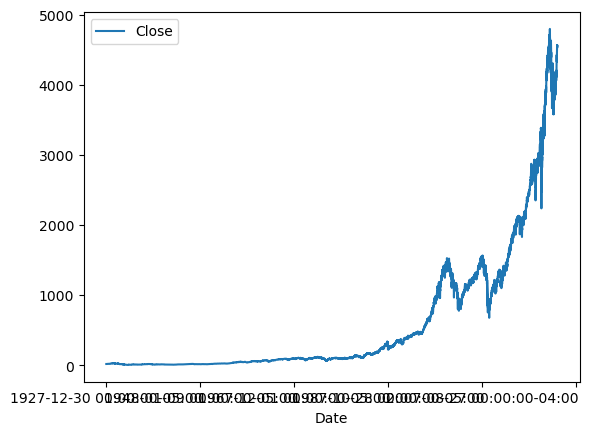

In [24]:
sp500.plot.line(y="Close", use_index=True)

In [25]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [26]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [27]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [28]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-21 00:00:00-04:00,4550.160156,4555.000000,4535.790039,4536.339844,3570190000,4554.640137,1
2023-07-24 00:00:00-04:00,4543.390137,4563.410156,4541.290039,4554.640137,3856250000,4567.459961,1
2023-07-25 00:00:00-04:00,4555.189941,4580.620117,4552.419922,4567.459961,3812470000,4566.750000,0


In [29]:
sp500 = sp500.loc["1990-01-01":].copy()

In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-21 00:00:00-04:00,4550.160156,4555.000000,4535.790039,4536.339844,3570190000,4554.640137,1
2023-07-24 00:00:00-04:00,4543.390137,4563.410156,4541.290039,4554.640137,3856250000,4567.459961,1
2023-07-25 00:00:00-04:00,4555.189941,4580.620117,4552.419922,4567.459961,3812470000,4566.750000,0


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [32]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.6078431372549019

<AxesSubplot: xlabel='Date'>

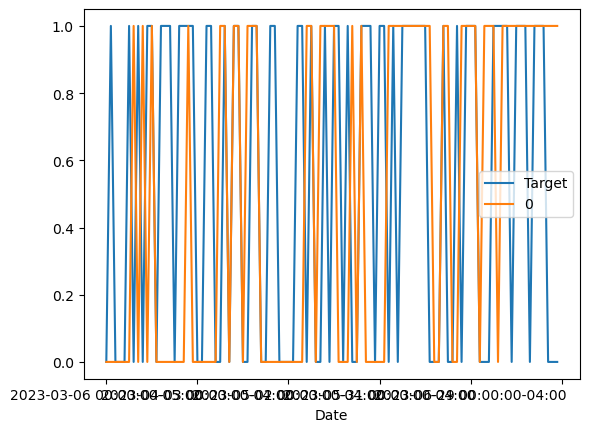

In [33]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [35]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [36]:
predictions = backtest(sp500, model, predictors)

In [37]:
predictions["Predictions"].value_counts()

0    3433
1    2524
Name: Predictions, dtype: int64

In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5301109350237718

In [39]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534161
0    0.465839
Name: Target, dtype: float64

In [40]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [41]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [42]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-21 00:00:00-04:00,4550.160156,4555.000000,4535.790039,4536.339844,3570190000,4554.640137,1,1.000162,1.0,0.998547,4.0,1.056627,34.0,1.121922,121.0,1.190026,535.0
2023-07-24 00:00:00-04:00,4543.390137,4563.410156,4541.290039,4554.640137,3856250000,4567.459961,1,1.002013,2.0,1.001172,4.0,1.058840,35.0,1.125794,121.0,1.194325,536.0
2023-07-25 00:00:00-04:00,4555.189941,4580.620117,4552.419922,4567.459961,3812470000,4566.750000,0,1.001405,2.0,1.003439,4.0,1.060046,35.0,1.128241,122.0,1.197174,537.0


In [43]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [44]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [45]:
predictions = backtest(sp500, model, new_predictors)

In [46]:
predictions["Predictions"].value_counts()


0.0    4140
1.0     817
Name: Predictions, dtype: int64

In [47]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5691554467564259

In [48]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.544079
0    0.455921
Name: Target, dtype: float64

In [49]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-07-21 00:00:00-04:00,1,0.0
2023-07-24 00:00:00-04:00,1,0.0
2023-07-25 00:00:00-04:00,0,0.0
